In [1]:
# Задание
# Построить 5 графиков по выбранным данным. 
#
# Графики должны быть различных видов и использовать хотя бы 3 из рассмотренных на занятии библиотек. 
#
# Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель 
# (например, посмотреть на корреляцию двух величин или на распределение значений) 
# и почему выбрали именно такой тип графика.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import seaborn as sns
import plotly
from geopy import distance

In [2]:
# Используем датасет "New York City Taxi Trip Duration"

In [ ]:
data = pd.read_csv('train.csv')
data.head()

In [ ]:
data['straight_distance'] = data.apply(lambda x: distance.distance((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],x['dropoff_longitude'])).miles, axis=1)

In [ ]:
data.head()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
straight_distance     1458644 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 133.5+ MB


In [35]:
desc = data.describe(percentiles=[0.001,0.999])
desc

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,straight_distance,trip_duration_group
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,2.138879e+00,2.017309e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,2.672057e+00,1.496316e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,0.000000e+00
0.1%,1.000000e+00,1.000000e+00,-7.401722e+01,4.064151e+01,-7.417761e+01,4.060423e+01,7.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,1.301179e+00,2.000000e+00
99.9%,2.000000e+00,6.000000e+00,-7.377669e+01,4.084248e+01,-7.373976e+01,4.088955e+01,8.512836e+04,1.538623e+01,5.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,7.708173e+02,5.000000e+00


In [9]:
# Первый график 
# Частота посадки и высадки из такси в зависимости от места расположения точки посадки / высадки 
#
# Используемые переменные: координаты численного типа
#
# Цель: отобразить распределение плотности мест заказов такси , которое можно использовать для различных оптимизаций,   
#       например для размещения такси по местности  для уменьшения времени прибытия такси  и обеспечения обслуживания   
#
# Тип графика: выбран график типа heatmap,
#              библиотека seaborn,
#                         

In [46]:
p_max_lat, p_max_long = desc['pickup_latitude']['99.9%'],desc['pickup_longitude']['99.9%']
p_min_lat, p_min_long = desc['pickup_latitude']['0.1%'],desc['pickup_longitude']['0.1%']
d_max_lat, d_max_long = desc['dropoff_latitude']['99.9%'],desc['dropoff_longitude']['99.9%']
d_min_lat, d_min_long = desc['dropoff_latitude']['0.1%'],desc['dropoff_longitude']['0.1%']


In [37]:
num_point = 1000
p = np.zeros((num_point+1,num_point+1))
d = np.zeros((num_point+1,num_point+1))
koef_lat = max(p_max_lat-p_min_lat, d_max_lat-d_min_lat)/num_point
koef_long = max(p_max_long-p_min_long, d_max_long-d_min_long)/num_point



In [55]:
for index, row  in data.iterrows():
    x = int((row["pickup_latitude"]-p_min_lat)/koef_lat)
    y = int((row["pickup_longitude"]-p_min_long)/koef_long)
    x = num_point-x if 0 <=x <= 1000 else 0 if x < 0 else 1000  
    y = y if 0 <=y <= 1000 else 0 if y < 0 else 1000  
    p[x,y]=p[x,y]+1

In [49]:
for index, row  in data.iterrows():
    x = int((row["dropoff_latitude"]-d_min_lat)/koef_lat)
    y = int((row["dropoff_longitude"]-d_min_long)/koef_long)
    x = num_point-x if 0 <=x <= 1000 else 0 if x < 0 else 1000  
    y = y if 0 <=y <= 1000 else 0 if y < 0 else 1000  
    d[x,y]=d[x,y]+1

In [56]:
n_p=1/(1+np.exp(-p))
n_d=1/(1+np.exp(-d))

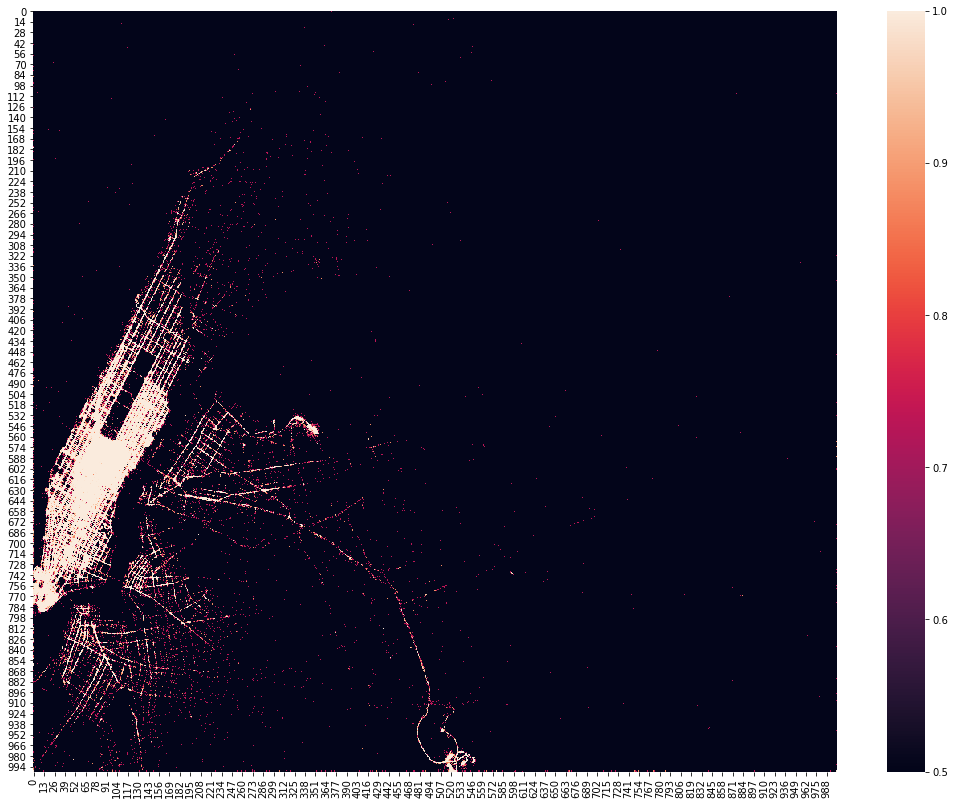

In [57]:
matplotlib.pyplot.figure(figsize=(18, 14))
sns.heatmap(n_p)

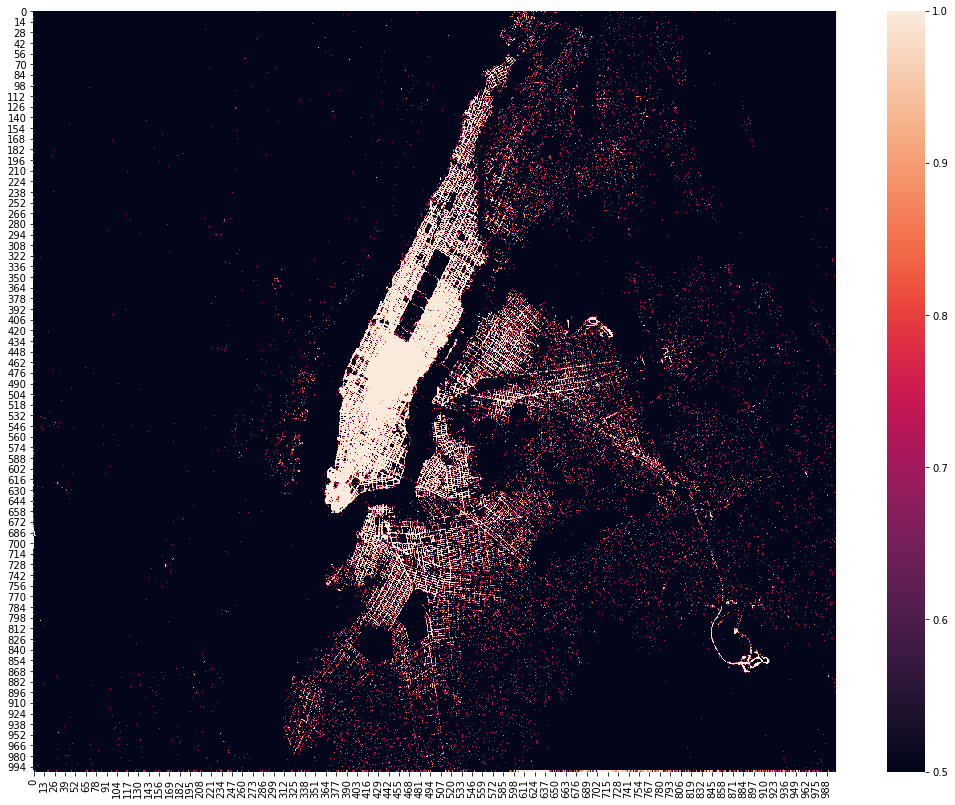

In [54]:
matplotlib.pyplot.figure(figsize=(18, 14))
sns.heatmap(n_d)

In [17]:
# Из рисунков видно, что наиболее массово такси используется для переездов по манхетену и для поездок в 2 аэропорта 
# Заметно что места посадок в такси более концентрированы чем места высадок, которые больше распределены по городу

In [18]:
# Построим линии связывающие точки посадки и точки высадки
# Используемые переменные: координаты численного типа
#
# Цель: отобразить отрезки соединяющие точки посадки и точки высадки  
#
# Тип графика: выбран график типа scattergeo,
#              библиотека plotly,

In [58]:
data['trip_duration_group'] = data.apply(lambda x: 0 if x['trip_duration'] <= 300 else 1 if 300 < x['trip_duration'] <=600 else 2 if 600< x['trip_duration'] <=900 else 3 if 900< x['trip_duration'] < 1200 else 4 if 1200 < x['trip_duration'] < 1800 else 5, axis=1)

In [ ]:
# Для отрисовки используем сэмплы по 100 поездок

In [59]:
sample_data_0 = data[data['trip_duration_group'] == 0].sample(n=100)
sample_data_1 = data[data['trip_duration_group'] == 1].sample(n=100)
sample_data_2 = data[data['trip_duration_group'] == 2].sample(n=100)
sample_data_3 = data[data['trip_duration_group'] == 3].sample(n=100)
sample_data_4 = data[data['trip_duration_group'] == 4].sample(n=100)
sample_data_5 = data[data['trip_duration_group'] == 5].sample(n=100)
sample_data_0.head() 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,straight_distance,trip_duration_group
1038475,id0517899,2,2016-02-04 14:06:41,2016-02-04 14:11:38,1,-73.958130,40.773071,-73.957115,40.780251,N,297,0.498242,0
592757,id3917017,2,2016-01-02 12:03:05,2016-01-02 12:08:04,1,-73.990852,40.718021,-73.986023,40.722584,N,299,0.404217,0
632093,id0477581,2,2016-03-12 00:42:48,2016-03-12 00:46:55,1,-73.990463,40.761551,-73.999062,40.749611,N,247,0.939337,0
1302215,id0765001,2,2016-04-22 12:53:31,2016-04-22 12:57:32,6,-74.014763,40.714069,-74.011421,40.721588,N,241,0.547674,0
1068912,id1583239,2,2016-03-23 00:51:05,2016-03-23 00:54:30,1,-73.987015,40.736851,-73.974411,40.732513,N,205,0.726099,0


In [60]:
p_s_data = pd.concat([sample_data_5,sample_data_4,sample_data_3,sample_data_2,sample_data_1,sample_data_0])
p_s_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,straight_distance,trip_duration_group
845930,id3870561,1,2016-03-08 14:37:30,2016-03-08 15:29:59,1,-73.991631,40.749168,-74.177071,40.694942,N,3149,10.429563,5
359004,id2107058,2,2016-04-09 00:01:05,2016-04-09 00:37:40,1,-74.009132,40.716461,-73.981361,40.780788,N,2195,4.671871,5
238895,id2137685,2,2016-05-16 10:25:33,2016-05-16 10:58:39,2,-73.982971,40.748188,-74.000160,40.762691,N,1986,1.347241,5
501138,id3361443,1,2016-05-13 11:55:02,2016-05-13 12:30:27,2,-73.990089,40.746143,-73.965858,40.765949,N,2125,1.866631,5
1341391,id1119939,2,2016-03-16 22:56:44,2016-03-16 23:35:07,2,-73.776787,40.645485,-73.941757,40.839542,N,2303,15.945699,5


In [100]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

trip_paths = []
color_group = {0:'red',
               1:'yellow',
               2:'orange',
               3:'green',
               4:'blue',
               5:'black'}
for index, row  in p_s_data.iterrows():
    trip_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ row['pickup_longitude'], row['dropoff_longitude'] ],
            lat = [ row['pickup_latitude'], row['dropoff_latitude'] ],
            mode = 'lines',
            line = dict(
                width = int((5-row['trip_duration_group'])/2)+1,
                color = color_group[row['trip_duration_group']],
            ),
            opacity = float(0.8),
        )
    )
    
layout = dict(
        title = 'Trip',
        showlegend = False, 
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data=trip_paths, layout=layout )
iplot( fig, filename='trip-paths' )

In [62]:
# Из получившегося пможно сделать вывод (что очевидно), что время в пути зависить от дальности перемещения, 
# однако можно увидеть, что если маршрут перехроодит в другой район  города, то время увеличивается. 
# Можно предположить, что это влияет география Нью-йорка с его мостами. 

In [63]:
# Второй график 
# Изменение использования такси различных vendor'ов в течении года 
#
# Используемые переменные: vendor - категориальная переменная типа - nominal 
#                          
# Цель: отобразить распределение плотности использования такси , которое можно использовать 
#       для размещения такси по местности с целью повышения скорости обслуживания 
#         
#
# Тип графика: выбран график типа Scatter,
#              библиотека plotly
#               

In [94]:
import datetime
vendor = data[['vendor_id', 'pickup_datetime']]
vendor['date']= vendor.apply(lambda x: x['pickup_datetime'][:10], axis=1)
vendor.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,vendor_id,pickup_datetime,date
0,2,2016-03-14 17:24:55,2016-03-14
1,1,2016-06-12 00:43:35,2016-06-12
2,2,2016-01-19 11:35:24,2016-01-19
3,2,2016-04-06 19:32:31,2016-04-06
4,2,2016-03-26 13:30:55,2016-03-26


In [95]:
res = vendor.groupby(['vendor_id', 'date']).count().reset_index()
res.head()

,vendor_id,date,pickup_datetime
0,1,2016-01-01,3068
1,1,2016-01-02,2905
2,1,2016-01-03,2916
3,1,2016-01-04,3178
4,1,2016-01-05,3322


In [96]:
res_p = res.pivot(columns='vendor_id', index='date',values='pickup_datetime')
res_p.head()

vendor_id,1,2
date,,
2016-01-01,3068,4094
2016-01-02,2905,3607
2016-01-03,2916,3437
2016-01-04,3178,3547
2016-01-05,3322,3882


In [97]:

#res_p.plot()
trace0 = go.Scatter(
    x=res_p.index,
    y=res_p[1],
    name='Vendor 1'
)

trace1 = go.Scatter(
    x=res_p.index,
    y=res_p[2],
    name='Vendor 2'
)

data_fig = [trace0, trace1]
layout = {'title': 'Vendor usage statistics'}

fig = go.Figure(data=data_fig, layout=layout)

iplot(fig, show_link=False)

In [98]:
# И получившегося графика видно, что имеется недельная цикличность использования такси 
# можно предположить, что есть такая же цикличность в среднем времени поездки


In [69]:
# Проверим это  
data['date'] = vendor['date']
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,straight_distance,trip_duration_group,date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.933406,1,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.123849,2,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,3.964154,5,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.921886,1,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.737591,1,2016-03-26


In [70]:
data_date = data[['date','trip_duration']].groupby('date').mean()

In [71]:
trace0 = go.Scatter(
    x=data_date.index,
    y=data_date['trip_duration'],
    name='trip_duration'
)
trace1 = go.Scatter(
    x=res_p.index,
    y=res_p[2]/4, # отмасштабируем для наглядности
    name='Vendor 2'
)

data_fig = [trace0, trace1]
layout = {'title': 'Trip duration '}

fig = go.Figure(data=data_fig, layout=layout)

iplot(fig, show_link=False)

In [72]:
# из графика можно видеть, что некий подобный недельный тренд так же имеется и в графике средниего времени в пути
# Объяснением этого может быт, то что  количество такси в городе сопоставимо с общим количеством автомобилей и они
# оказывают существенное влияние на трафик на дорогах, что влияет на время движеня 

In [73]:
# Третий график 
# распределение количества пассажиров
#
# Используемые переменные: численные  
#                          
# Цель: количество пассажиров  
#
# Тип графика: выбран график типа bar,
#              библиотека pandas
#              

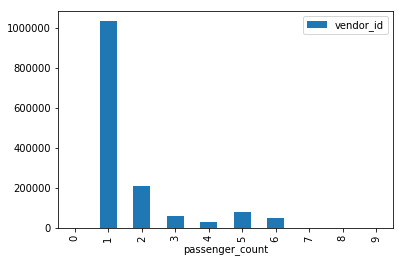

In [74]:
data[['passenger_count','vendor_id']].groupby('passenger_count').count().plot.bar()

In [99]:
# Видно, что наиболее массово такси используют одиночные пассажиры.
# Интересно, что наиболее редко такси используют группы из 4 пассажиров

In [75]:
# Четвертый график 
# Распределение длительности попоездок по времени в сутки для различного числа пассажиров 
#
# Используемые переменные: vendor - категориальная переменная типа - nominal 
#                          
# Цель: отобразить распределение плотности использования такси , которое можно использовать 
#       для размещения такси по местности с целью повышения скорости обслуживания 
#         
#
# Тип графика: выбран график типа Scatter,
#              библиотека plotly
#                

In [76]:
passenger_count = data['passenger_count'].value_counts()


In [77]:
data['hour']= data.apply(lambda x: int(x['pickup_datetime'][11:13]), axis=1 )


In [78]:
data_trip = data[['passenger_count','hour','trip_duration']].groupby(['passenger_count','hour']).mean().reset_index()


In [79]:
data_trip_all = data[['hour','trip_duration']].groupby('hour').mean().reset_index()


In [80]:
data_trip_p = data_trip.pivot(index='hour', columns='passenger_count', values='trip_duration').reset_index()
data_trip_p['all'] = data_trip_all['trip_duration']


In [81]:
traces = []
for p_c in range(1,7):
     traces.append(
         go.Scatter(
             y=data_trip_p[p_c],
             x=data_trip_p['hour'],
             name = str(p_c)
         )
     )
traces.append(
         go.Scatter(
             y=data_trip_p['all'],
             x=data_trip_p['hour'],
             name = str('all'),
             mode = "lines+markers"
         )
)
        
layout = {'title': 'The average duration of the trip for a different number of passengers',
           'xaxis': dict(title= 'Hour start')}   

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

In [82]:
# И графиком явно видно что время в пути зависит от времени начала поездки, 
# что легко объясняется загрузкой дорог в течении суток
# интересны выбросы  в среднем времени движения для больших груп пассажиров в ночное время 
# (возможно это связанно с тем что такси заказывается для поездки в аэропорт, 
#  маршрут для которого судя по картинкам из первого графика достаточно загружен)

In [83]:
# Пятый график 
# Распределение времени поездок 
#
# Используемые переменные: численые 
#                          
# Цель: отобразить распределение времени поездок 
#         
#
# Тип графика: выбран график типа Distplot,
#              библиотека Seaborn
#         
# График построим на 2 видах. Для выделения основной части распределения и хвоста. 

In [84]:
desc = data.describe(percentiles=[0.1,0.25,0.75,0.9,0.985])


/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



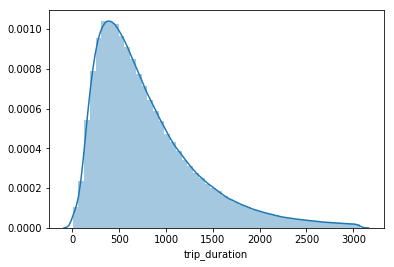

In [85]:
sns.distplot(data[data['trip_duration'] < desc['trip_duration']['98.5%']]['trip_duration'])


In [86]:
# Распределение похоже на логарифмическое нормальное распределение, на распределение с положительной ассиметрией.

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



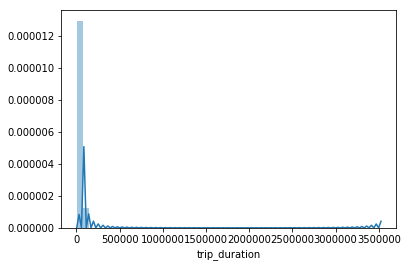

In [87]:
sns.distplot(data[data['trip_duration'] > desc['trip_duration']['98.5%']]['trip_duration'])

In [88]:
# шестой график 
# Распределение скорости движения
#
# Используемые переменные: численые 
#                          
# Цель: отобразить среднюю абсолютную скорость движения по часам
#         
#
# Тип графика: выбран график типа Boxplot,
#              библиотека Seaborn
#         
# 

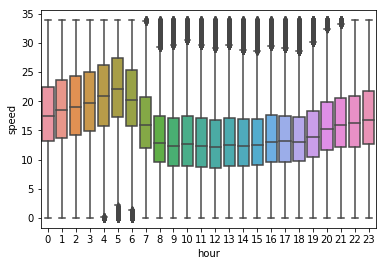

In [89]:
data['speed'] = (data['straight_distance']* 1.852) / (data['trip_duration']/3600 )
sub_data = data[(data['speed'] < data['speed'].quantile(.95))]
sns.boxplot(x='hour', y='speed', data=sub_data);
matplotlib.pyplot.show()

In [90]:
# График демонстрирует суточный цикл в средней абсолютной скорости движения и 
# судя по виду хорошо корелирует с графиком среднего времени движения

In [91]:
# Построим для смредней скорости график распределения аналогичный графику времени движения
# Распределение времени поездок 
#
# Используемые переменные: численые 
#                          
# Цель: отобразить распределение средней скорости поездок 
#         
#
# Тип графика: выбран график типа Distplot,
#              библиотека Seaborn
#         
# 


/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



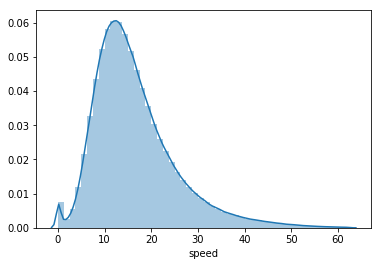

In [92]:
sns.distplot(data[data['speed'] < data['speed'].quantile(.999)]['speed'])

In [93]:
# Из графика видно, что распределение аналогичное распределению 
# времени движения однако имеются аномалии в области малых скоростей.